<a href="https://colab.research.google.com/github/dongchanlim/dabundante/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 주제
어떤 사람들이 타이타닉 호에서 살아남는데 가장 유리했을까요?

## Titanic Dataset이란?

Kaggle의 가장 대표적인 데이터셋인 Titanic 데이터셋을 분석해봅시다.

Kaggle이란 2010년 설립된 예측모델 및 분석 대회 플랫폼입니다. 기업 및 단체에서 데이터와 해결과제를 등록하게되면, 데이터 과학자들은 이를 분석하고, 해결하는 모델을 개발하고 경쟁하는 공간입니다.

RMS 타이타닉은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선으로 첫 항해 당시 세계에서 가장 큰 배 가운데 하나였습니다. 그러나, 아시다시피 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 빙산과 충돌하여 1,514명이 사망하게 되었습니다.

Kaggle은 이 사건에 대하여 승객의 데이터를 제공하고, “어떤 종류의 사람들이 생존할 가능성이 더 높았습니까?”라는 질문을 하였습니다.

### 타이타닉 데이터셋
* train.csv
    - 승객의 이름, 나이, 성별, 사회경제적 등급 등 승객 정보와 생존 여부를 알려주는 데이터
    - 머신러닝 학습 모델을 구축하는 것에 사용

* test.csv
    - train.csv와 유사하나, 생존 여부를 알려주지 않은 데이터
    - 모델이 예측을 얼마나 잘 수행하는지 확인하는데 사용하는 데이터

#### 타이타닉 데이터셋의 Column들
- PassenserId : 승객의 고유 Id
- **survived : 생존여부 (0 = 사망, 1 = 생존)**
- Pclass : 티켓 클래스 (1 =1등석, 2 = 2등석, 3 = 3등석)
- Name : 이름
- Sex : 성별 (male = 남성, female = 여성)
- Age : 나이
- Sibsp : 타이타닉 호에 동승한 형재/배우자의 수
- Parch : 타이타닉 호에 동승한 부모/자녀의 수
- Ticket : 티켓 번호
- Fare : 탑승 요금
- Cabin : 방 호수
- Embarked : 탑승지의 고유 이니셜 (C = Cherbourg, Q = Queenstown, S = Southampton)

# 데이터셋 저장 및 불러오기
## 캐글에서 타이타닉 데이터를 저장한 뒤 Google Colab에서 사용해보아요.
1. [Kaggle](https://www.kaggle.com/c/titanic/data)에서 Titanic Data 저장하기
2. 원하는 구글 드라이브 폴더에 파일 업로드
3. pandas.read_csv(경로)를 통해 csv파일을 데이터프레임 형태로 읽어오기

In [ ]:
# 필요한 라이브러리 가져오기
import pandas as pd #데이터셋 관련 라이브러리
import seaborn as sns #시각화 관련 라이브러리
import missingno as msno #결측값 관련 라이브러리
import matplotlib.pyplot as plt #차트 표현 모듈

# 버전이 자주 업그레이드 되는 라이브러리나, 파이썬 IDE를 사용하다보면 버전이 상향됨에 따라 변경될 수 있음을 알려주는 경고메세지를 출력해주는데, 
# 지금 상황에서는 의미가 없으니 Error 메세지를 무시하도록 설정하는 명령어 입니다.

import warnings 
warnings.filterwarnings("ignore")

# 도표와 같은 그림, 소리, 애니메이션과 같은 결과물들을 Rich output을 노트북을 실행한 브라우저에서 바로 볼 수 있도록 도와주는 명령문
%matplotlib inline

In [ ]:
# Colab에서 구글 드라이브에 접근할 수 있도록 설정하고, 
# Drive에 저장된 파일을 Colab으로 불러와봅시다.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 분석하기 쉽도록 csv파일을 데이터 프레임 형태로 가져와볼까요?
# 데이터 프레임 : 행과 열로 구성된 2차원 테이블로서 엑셀의 스프레드 시트와 유사한 모양
# 행은 테이블의 가로줄으로, Row라고 불리며, 샘플 하나하나에 관한 "정보"를 의미합니다.
# 열은 테이블의 세로줄로서, Column이라고 불리며, "데이터의 속성"이라는 의미를 가지고 있습니다.
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/datasets/train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/datasets/test.csv")

# 데이터셋 둘러보기
## 이제 Python의 여러 함수를 이용하여 데이터가 어떻게 생겼는지 살펴봅시다.

In [ ]:
# 데이터 프레임의 전체적인 구조를 알아봅시다.
# info() : 컬럼의 인덱스와 이름, 행의 개수, 저장된 데이터 타입, 메모리 사용량을 확인할 수 있음
# 왜 Age와 Cabin, Embarked 컬럼만 행의 개수가 다를까?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 데이터셋의 행렬 개수를 살펴보아요.
print("학습용 데이터의 행과 열의 개수 : ", train.shape) 
print("검증용 데이터의 행과 열의 개수 : ", test.shape) #학습용 데이터보다 컬럼수가 1개 적다?!

학습용 데이터의 행과 열의 개수 :  (891, 12)
검증용 데이터의 행과 열의 개수 :  (418, 11)


In [ ]:
# 데이터의 컬럼들은 어떻게 구성되어 있을까요?
print("학습용 데이터의 컬럼 : ", train.columns)
print("검증용 데이터의 컬럼 : ", test.columns) 
# 생존 결과인 'Survived'가 포함되지 않았기 때문입니다. 우리는 나중에 test 데이터의 Survived, 즉 승객의 생존 여부를 예측할 것입니다.
# 이렇게 예측의 목표가 되는 변수를 예측 변수, 또는 종속 변수라고 합니다.
# 그 외에 예측을 하는데 영향을 미치는 변수들은 독립변수라고 칭하게 됩니다.

학습용 데이터의 컬럼 :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
검증용 데이터의 컬럼 :  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# 상위 5개 행을 통해, 각 컬럼들의 값을 살펴볼까요?
train.head() #학습용 데이터의 상위 5개 행 확인하기 #tail() : 하위 5개 행 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head() #검증용 데이터의 상위 5개 행 확인하기 #훈련용 데이터와 유사하지만, 차이점은 'Survived' 행의 존재 여부

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 각종 통계량을 알아보자.
# describe() : 누락된 데이터(NaN)를 제외하고, 수치형 데이터에 관하여 행의 수, 평균 등 기초 통계량을 요약해서 제공해주는 메소드
# count : 행의 수
# mean : 평균
# std : 표준편차
# min : 최소값 / max : 최대값
# 25% : 상위 25% / 75% : 하위 25%
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 시각화와 함께 데이터 살펴보기
## 차트 고르는 방법
- 우리는 초등학교 때 부터 막대 그래프 등 여러가지 그래프를 보았습니다. 수많은 행과 열로 이루어진 **데이터를 한 눈에 파악**하기 위해서는 적합한 시각화 유형을 선택해야 합니다. 아름답기만 한 차트는 데이터 파악이라는 목적을 이룰 수 없습니다. 
- 따라서, 우리는 기준을 잡고, 각 차트의 장단점을 기반으로 적합한 차트를 선택해야 합니다.

### 기준
1. 하나의 차트에 몇 개의 변수를 표시할 것인가?
2. 각 변수에 관해 몇 개의 항목을 표시할 것인가?
3. 일정 시간 또는 항목, 그룹 간 값을 표시할 것인가?
> Reference : https://brunch.co.kr/@joecool/148

### 차트 종류
    * 카운트 플롯(Count Plot) : 범주형 변수의 빈도수를 시각화하는 그래프
    * 누적 바 차트(Stacked Bar Chart) : 2개 이상의 그룹을 쌓아서 표현하는 bar plot으로, 그룹별로 특정 값들의 비중을 보여주기 위한 목적으로 사용합니다.
    * 파이 플롯(Pie Plot) : 전체 분량에서 특정 범주가 얼마만큼 차지하는지를 중심각으로 표현하는 그래프로서, 범주가 많을 경우에는 비효율적일 수 있습니다.
    * 상자 수염 그림(박스 플롯 (Box plot), 박스-위스커 플롯 (Box-Whisker plot))
        * 가운데 박스 모양으로부터 그려지는 중심선을 수염 (Whisker)이라고 하며, 중앙값(작은 값부터 오름차순으로 정렬하였을때 중심에 위치하는 값)을 나타냅니다.
        * boxplot() 함수는 기본적으로 Q1 - whis*(Q3-Q1)까지 수염 (Whisker) ~ Q3 + whis*(Q3-Q1)를 나타냅니다.
        * 제1사분위 수(Q1) : 하위 25%에 해당하는 값
        * 제2사분위 수(Q2) : 50%에 해당하는 값(중앙값)
        * 제3사분위 수(Q3) : 상위 25%에 해당하는 값
        * 사분위 범위 수(IQR) : Q3-Q1
        * 최댓값 : Q3+(1.5*IQR) / 최솟값 : Q1-(1.5*IQR)
        * 이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값
    * 커널 밀도 추정(kernal density estimation) 그래프
        * 밀도 추정 : 변수가 전체적으로 어떤 확률적인 특성을 나타내는 지 파악하여 그 확률적 특성이 결국 변수의 특성이라고 추론하는 방법
        * histplot이 count(절대량)을 표현한다면, kdeplot은 비율(상대량)을 시각화 합니다.
    * 히스토그램(histogram)
        * 연속형 변수의 값 또는 분포 형태를 보여주는 그래프로서, 이를 통해 데이터의 중심, 분포 및 형태를 확인할 수 있습니다.
        * 히스토그램과 막대 차트의 차이점은 무엇일까요?
        * 히스토그램은 연속형 데이터에 사용되는 반면, 막대 차트는 범주형 또는 명목형 데이터에 사용됩니다.
    * 막대 그래프(Bar chart)
        * 그룹별로 수치를 요약하는 그래프로서 막대 그래프에서는 동일한 너비의 여러 막대를 사용하여 데이터를 표시합니다.
        * 각 막대는 특정 그룹을 나타내고, 각 막대의 높이는 특정 집계(예: 나타내는 범주에 있는 값의 합, 레코드 수)에 비례합니다.
        * 카테고리별 값의 비교가 한눈에 들어오기 때문에, 최대/최소 값을 한눈에 비교할 수 있다는 장점이 있습니다.

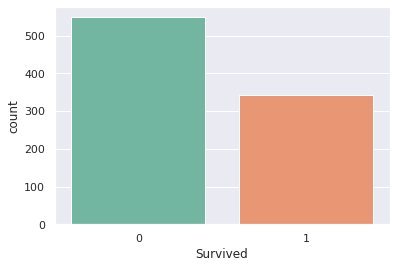

In [ ]:
# 카운트 플롯으로 Survived 필드부터 확인해볼까?
# 생존자가 1/2 정도밖에 안되네? 
# 종속 변수가 불균형 데이터인 경우, 과대 적합(Over Fitting)으로 인하여 예측에 문제가 생길 수 있습니다.
# overfitting이란 머신러닝이 학습데이터를 과하게 학습한다는 것을 의미합니다. 과일(실제 데이터)에 대해서 배울 때 바나나만 가르쳐준다면(학습 데이터), 어떤 과일을 주더라도 바나나라는 답이 나오게 됩니다.
# 즉, 머신러닝 또한 과적합이 될 경우 학습 데이터에 대해서는 모두 정확히 맞추게 되어 오차가 감소하지만, 실제 데이터에 대해서는 예측률이 떨어지는 현상을 보이게 됩니다.
%matplotlib inline
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")


# 생존자와 사망자 수를 보여주는 카운트 플롯 만들기
sns.countplot('Survived', data=train)
plt.show()

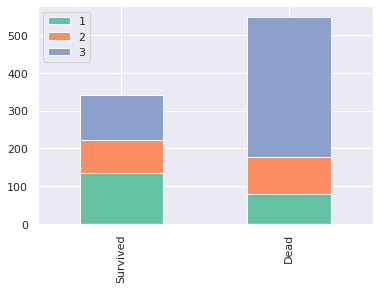

In [ ]:
# 누적 바 차트(Stacked Bar Chart)를 통해 티켓 클래스(Pclass) 별 생존자 수 알아보기
# 사망자는 생존자보다 1번 티켓은 적게 구매하였고, 3번 티켓을 많이 구매했었구나.

# 생존자와 사망자를 티켓 클래스별로 카운트하는 데이터 프레임 만들기
survived = train[train['Survived'] == 1]['Pclass'].value_counts()
dead = train[train['Survived'] == 0]['Pclass'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']

# 데이터 시각화하기
df.plot(kind='bar', stacked=True)
plt.show()

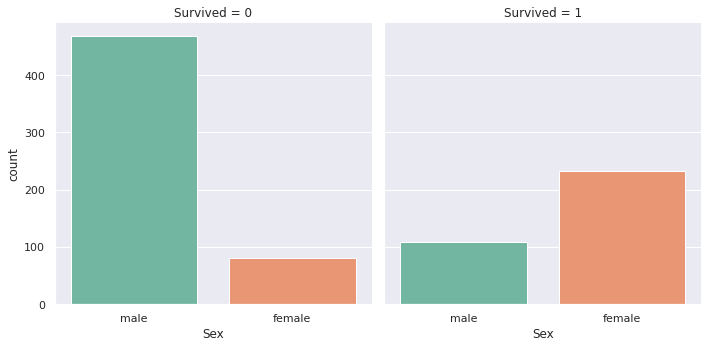

In [ ]:
# 생존자의 성비는 어떻게 될까?
sns.catplot(x='Sex', col='Survived', kind='count', data=train)

plt.show()

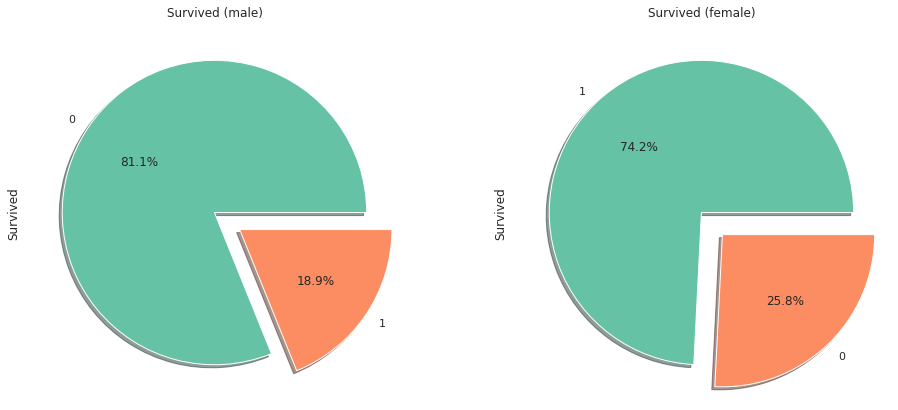

In [ ]:
# 여성보다 남성이 더 많이 사망한 것 같기는 한데... 파이 플롯을 통해 비율을 볼까?
# 남성의 생존 확률은 19%도 안되는데, 여성은 74%나 되네?!

f,ax=plt.subplots(1,2,figsize=(16,7))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

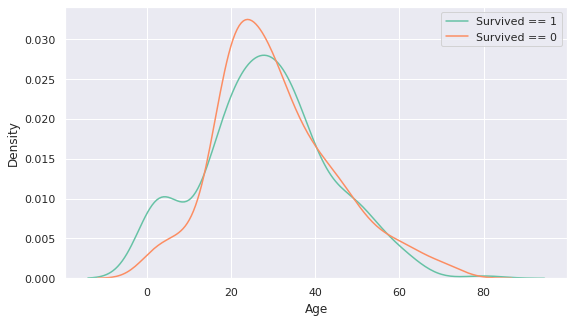

In [ ]:
# 승객들의 나이 분포는 어떻게 되는지 커널 밀도 그래프를 통해 살펴볼까?
# 20대 후반이 가장 많은 것 같은데...
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

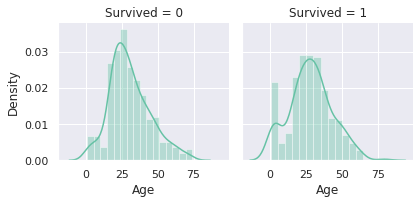

제일 어린 승객의 나이 : 0.42
제일 연장자인 승객의 나이 : 80.0
승객의 평균 나이 : 28.343689655172415


In [ ]:
# 히스토그램과 함께 더 자체히 확인해볼까요?
# 어릴 수록 생존 확률이 높아보이네요!
# 나중에 연령대별로 구간을 나누면 더욱 쉽게 분석을 진행할 수 있어요.
sns.FacetGrid(data=train, col='Survived').map(sns.distplot, 'Age')
plt.show()

print('제일 어린 승객의 나이 :', train[train['Survived'] == 1]['Age'].min()) #1살보다 어린 아이의 경우 소수로 나이를 표현합니다.
print('제일 연장자인 승객의 나이 :', train[train['Survived'] == 1]['Age'].max()) 
print('승객의 평균 나이 :', train[train['Survived'] == 1]['Age'].mean())

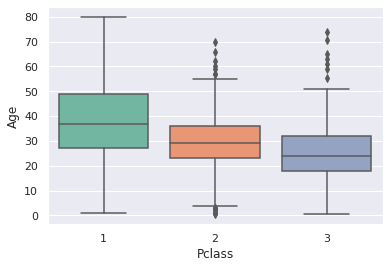

In [ ]:
# 나이가 많을 수록 높은 등급의 티켓을 살 것 같은데.. 상자 수염 그림을 통해 확인해볼까요?
# 1번 클래스가 평균 나이대가 높은 것을 볼 수 있습니다.
# 2, 3번 클래스에는 이상치가 많네요.

sns.boxplot(x='Pclass', y='Age', data = train)

plt.show()

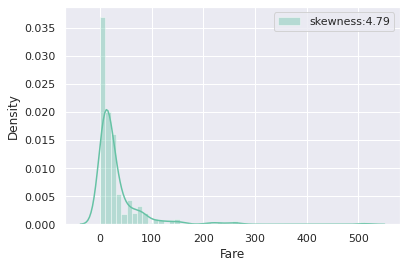

In [ ]:
# 히스토그램을 통해 탑승요금(Fare) 값을 확인해볼까요?
# 좌측으로 치우쳐 있는 비대칭 모델인 것을 확인할 수 있습니다. 이대로 학습을 진행한다면 이상치에 예민한 반응을 하기 때문에 전처리가 필요합니다.
sns.distplot(train['Fare'], label='skewness:%.2f'%train['Fare'].skew()).legend(loc='best')
plt.show()

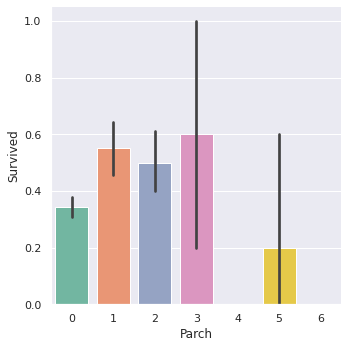

Survived    0.6
dtype: float64


In [ ]:
# 막대그래프를 통해 부모/자녀의 수를 확인해봅시다.
# 부모/자녀의 수가 3명일 경우의 생존 확률이 60%로 가장 높고, 3명 이하일 경우의 생존 확률이 더 높네.
# 검은색 선 : 
sns.factorplot('Parch', 'Survived',data=train, kind='bar')
plt.show()
print(train[['Parch','Survived']].groupby('Parch').mean().max())

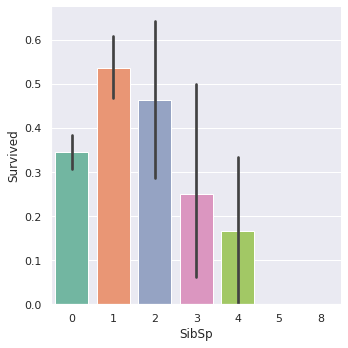

Survived    0.535885
dtype: float64


In [ ]:
# 막대그래프를 통해 형제의 수를 확인해봅시다.
# 형제/자매의 수가 1명일 경우의 생존 확률이 가장 높고, 2명 이하일 경우의 생존 확률이 더 높네.
sns.factorplot('SibSp', 'Survived',data=train, kind='bar')
plt.show()

print(train[['SibSp','Survived']].groupby('SibSp').mean().max())

In [ ]:
# 그렇다면 가족의 수로 계산했을 경우는, Parch가 3이고, SibSp가 1, 본인 1명으로 총 5명일 경우 생존 확률이 가장 높을까?
# SibSp 는 형제/자매의 수를 뜻하고, Parch는 부모/자녀의 수를 뜻하는데,
# 두 컬럼 값에 탑승한 승객 자신을 포함하여 1을 더하면 동승한 가족의 수가 되겠죠?
# 파생변수 생성
# FamilySize = SibSp + Parch + 1
# 가족의 수가 n명일 경우의 생존 확률이 가장 높다고 확인되었습니다.
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1 

sns.factorplot('FamilySize', 'Survived', data=train, kind='bar')

plt.show()


SyntaxError: ignored

In [ ]:
# 탑승지도 생존 가능성과 관계가 있을까요?
# C, 즉 Cherbourg에서 출발한 탑승객이 가장 생존 확률이 높은 것으로 확인됩니다.
sns.factorplot('Embarked', 'Survived',data=train, kind='bar')
plt.title("Embarked") #그래프 이름 지정

# 결측치(Missing Value) 확인하기
## 결측치란?
- 결측치 : 데이터가 누락됨, 즉 값이 없다는 것을 의미합니다.
- NaN (Not a Number) : 숫자가 아니다, 즉 값이 유효하지 않다는 뜻입니다. 이는 pandas의 데이터에서 값이 비어있는 경우를 표시합니다.
- 그렇다면 None과 같은 뜻인가요?
    - None : 존재하지 않는다, 즉 비어있는 값을 나타냅니다. 파이썬의 데이터프레임에 None 데이터를 넣게 되면, NaN 객체로 자동 변환이 됩니다. 따라서, NaN은 값이 비어있는 경우, 결측치(Missing Value)를 의미합니다.

- 결측치 처리
    - 결측치가 많을 경우 : 머신러닝이 학습하는데 성능을 떨어뜨리거나, 아예 학습이 진행되지 않을 수도 있습니다.
    - 따라서, 결측치가 포함된 행이나 열을 제거해버리거나, 결측값을 다른 통계값으로 대체해주는 전처리가 필요합니다.

In [ ]:
# 각 컬럼이 보유한 결측치의 개수를 확인해봅시다.
# isnull().sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

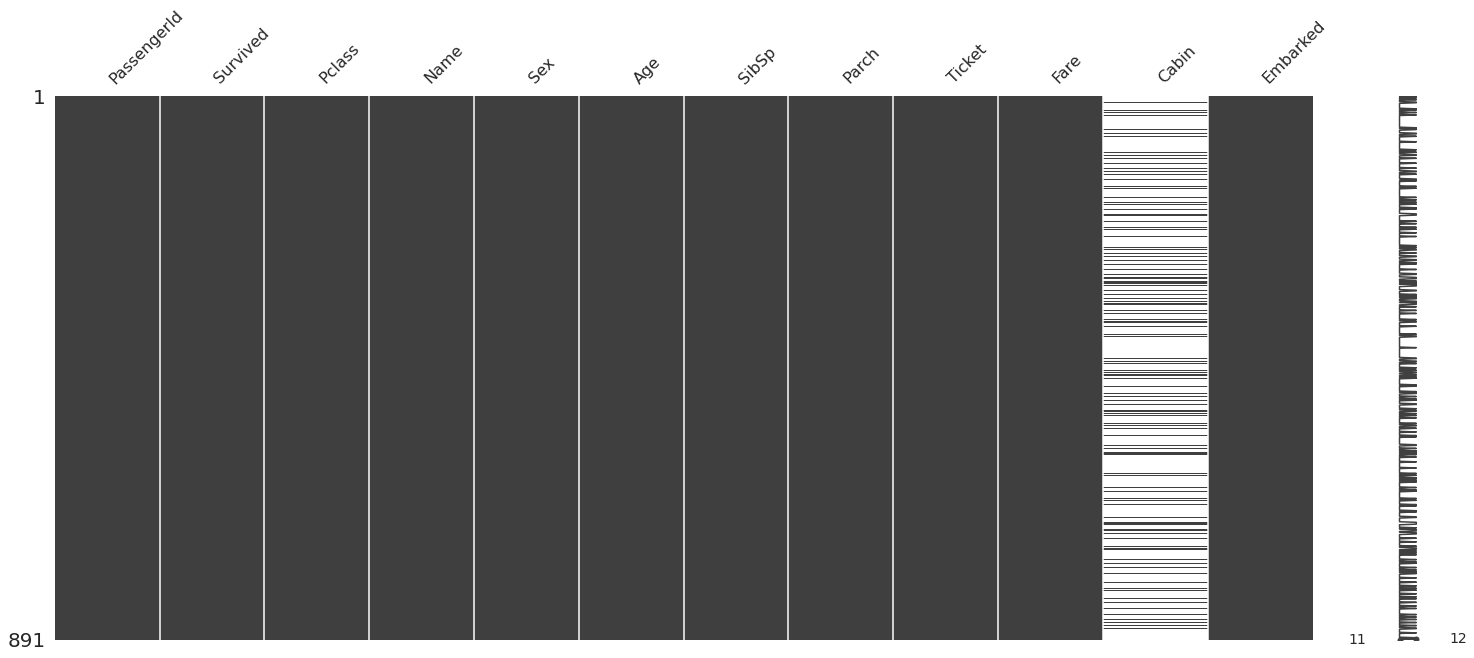

In [ ]:
# 각 컬럼이 보유한 결측치의 분포를 스파크라인을 통해 확인해봅시다.
# msno.matrix(데이터 프레임)
# 스파크라인(spark line) : 각 샘플의 데이터 완성도를 표현한 그래프로, 흰색 부분은 결측값을 의미합니다. 결측값의 분포를 확인할 때 유용합니다.
msno.matrix(train)

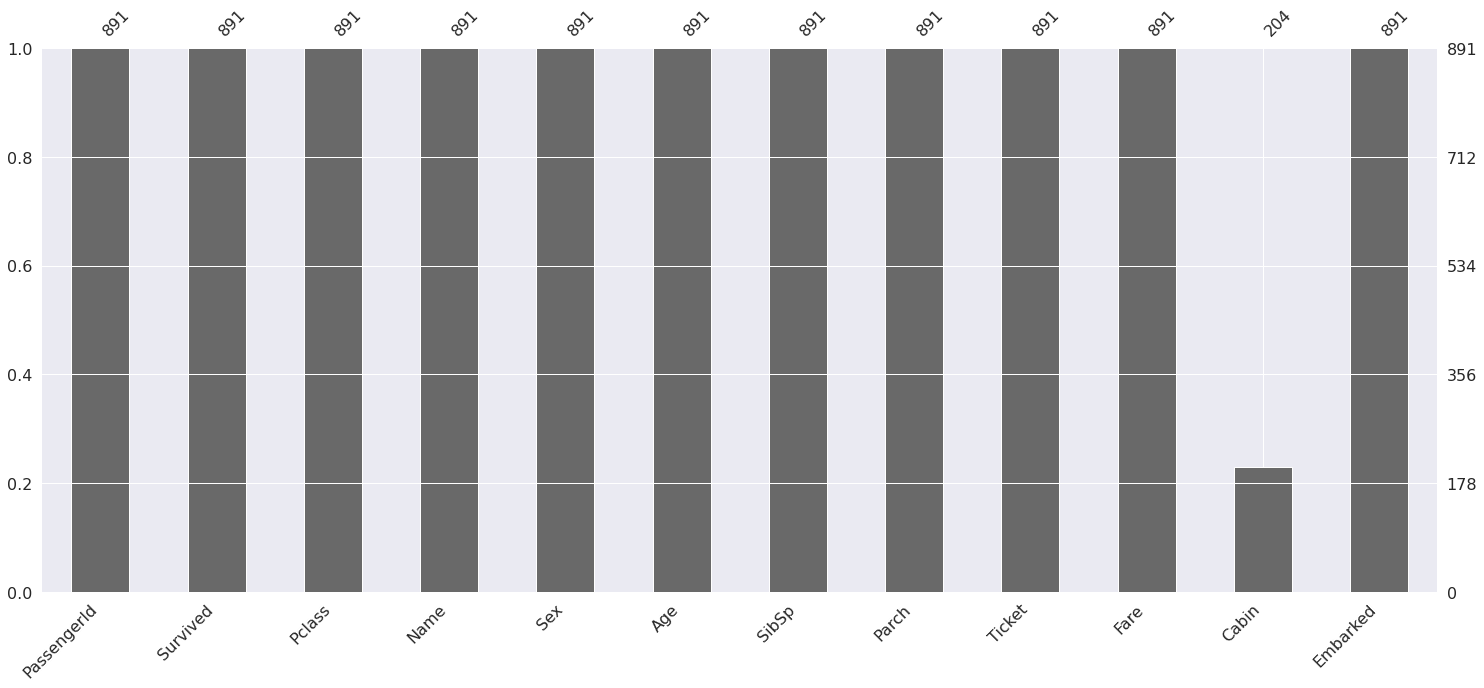

In [ ]:
# 각 컬럼이 보유한 결측치의 개수와 분포를 막대그래프를 통해 확인해봅시다.
# msno.bar(데이터셋)
# 막대그래프 : 막대바를 통해 필드별로 결측값이 얼마나 있는지 표현해주는 그래프로, 결측값 개수와 함께 막대바를 통해 결측값 분포를 확인할 수 있습니다.
msno.bar(train)

# 전처리 - 결측값 처리
## 결측값 제거
1. 결측값 제거 - 데이터프레임.dropna()
    * 결측값이 있는 모든 행을 제거
    * `train.dropna()`

2. 결측값 제거 - 데이터프레임.dropna(axis=1)
    * 결측값이 있는 모든 컬럼을 제거
    * `train.dropna(axis=1)`

3. 결측값 제거 - 데이터프레임.dropna(thresh=일정개수, axis=1)
    * 일정 개수 이하의 결측치 데이터가 있는 컬럼만 남기고 나머지 컬럼 제거
    * `train.dropna(thresh=7, axis=1)`

4. 결측값 제거 - 데이터프레임.dropna(thresh=int(len(데이터셋) * 0.5). axis=1)
    * 일정 비율 이하의 결측치 데이터가 있는 컬럼만 남기고 나머지 컬럼 제거
    * `train.dropna(thresh=int(len(titanic) * 0.5). axis=1)`

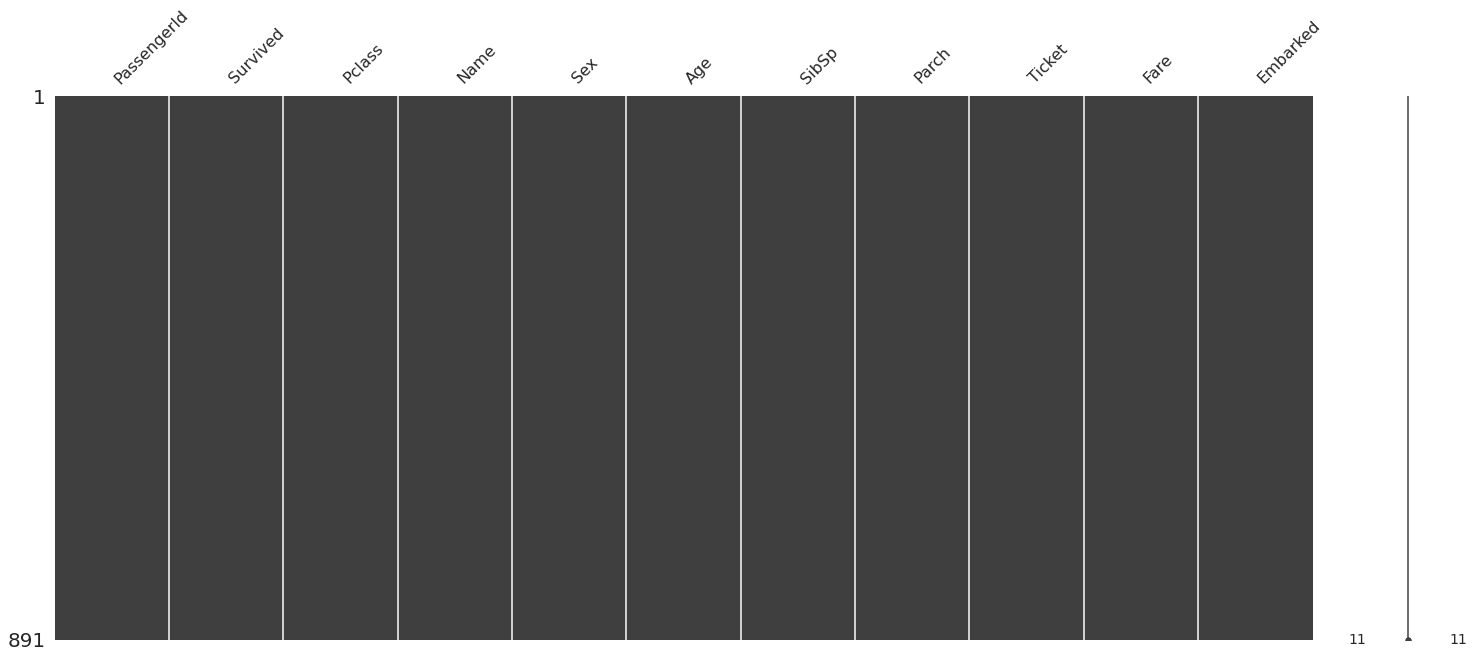

In [ ]:
# 결측값이 50% 이상인 필드 삭제
# 결측값이 50% 이상일 경우, 대체 값으로 처리할 경우 실제 데이터는 반도 되지 않기 때문에, 이런 경우는 컬럼을 삭제하는 편이 나아 보입니다. 
train = train.dropna(thresh=int(len(train) * 0.5), axis=1)
# 결측값이 50%이상 포함된 컬럼인 Cabin 필드가 제거된 모습을 확인할 수 있습니다.
msno.matrix(train)

# 전처리
## 결측값 처리 - 결측값 대체
* 여러 값이 비어있는 경우에 데이터의 행 또는 열을 모두 삭제해버린다면, 사용할 수 있는 데이터가 너무 적어질 것입니다. 따라서, 우리는 결측값들을 데이터의 특징을 대표하는 특정 값으로 대체하기도 합니다.
1. 결측값 대체 - SimpleImputer(strategy = "원하는 방법")
    - 원하는 방법: 평균값(mean), 중위수(median), 최빈수(most_frequent)
    - 일반적인 적용 방법
        * 실수형 연속값
            * 정규분포 : 평균
            * 비정규분포 : 중위수
        * 카테고리 : 최빈값
    - 코드 예시
        * 
        ```
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy="most_frequent")
        df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
        ```

### Quiz 
1. 타이타닉 데이터셋에서 결측값들을 확인해봅시다.
2. 각 결측값은 어떻게 처리해야할까요?
3. 그렇게 처리하는 이유는 무엇일까요?

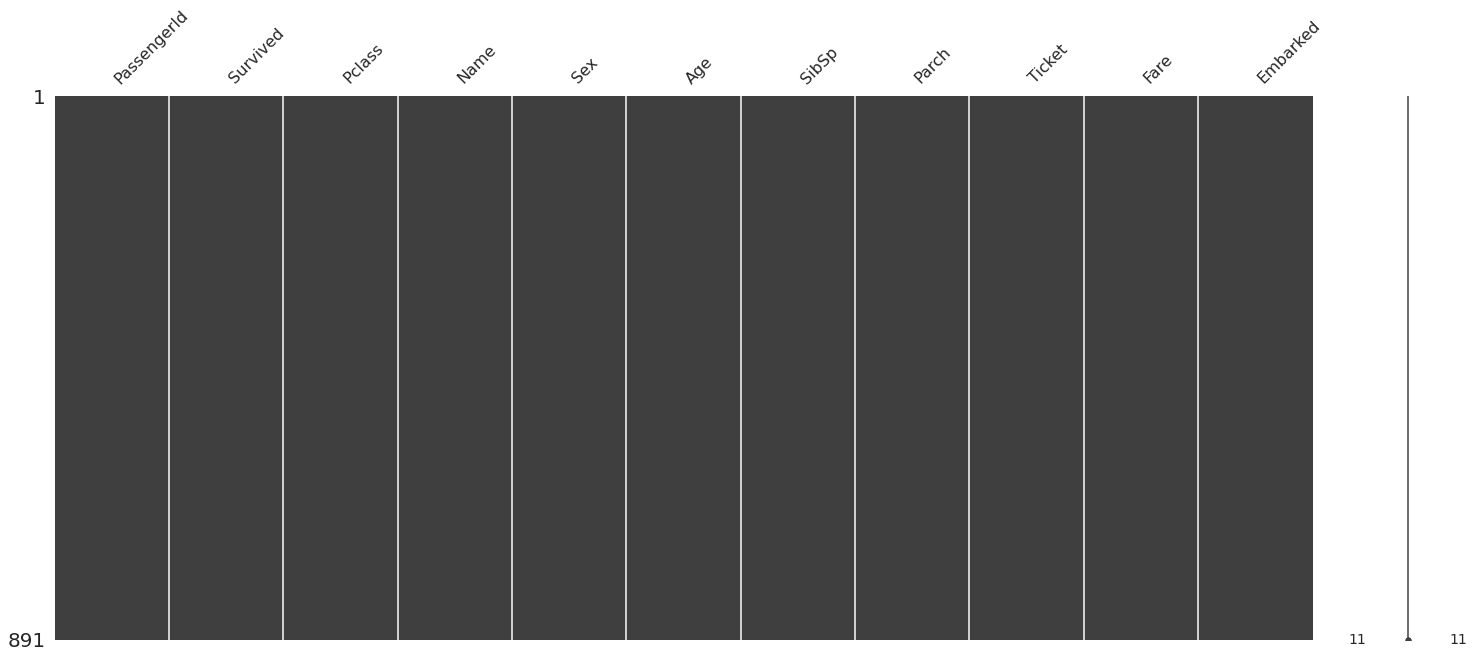

In [ ]:
# Embarked 필드는 카테고리형이므로 최빈값으로 결측값 대체하기
from sklearn.impute import SimpleImputer
imputer_embark_town = SimpleImputer(strategy="most_frequent")

# 출발지
train["Embarked"] = imputer_embark_town.fit_transform(train[["Embarked"]]) 
#fit_transform(2차원배열) : 학습 및 훈련

msno.matrix(train) #결측치 없음!
plt.show()

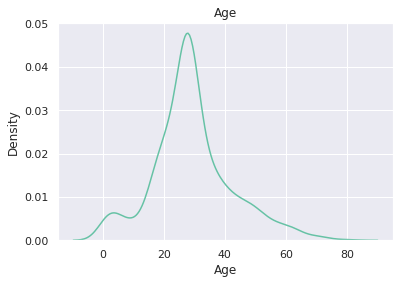

In [ ]:
# age 분포 확인하기 : 비대칭(비정규분포)
sns.kdeplot(train.Age) 
plt.title("Age")
plt.show()

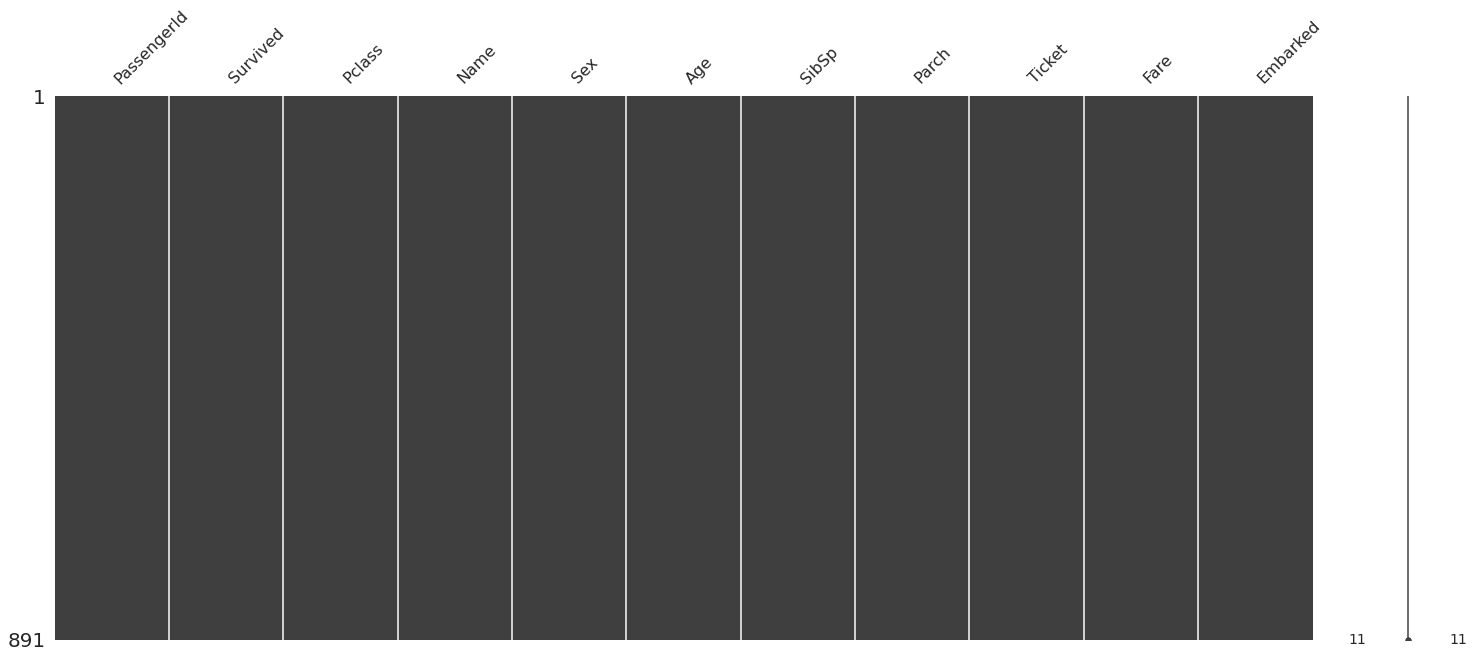

In [ ]:
#비대칭의 경우 중위수를 사용함
imputer_age = SimpleImputer(strategy="median")
train["Age"] = imputer_age.fit_transform(train[["Age"]])

msno.matrix(train)
plt.show()

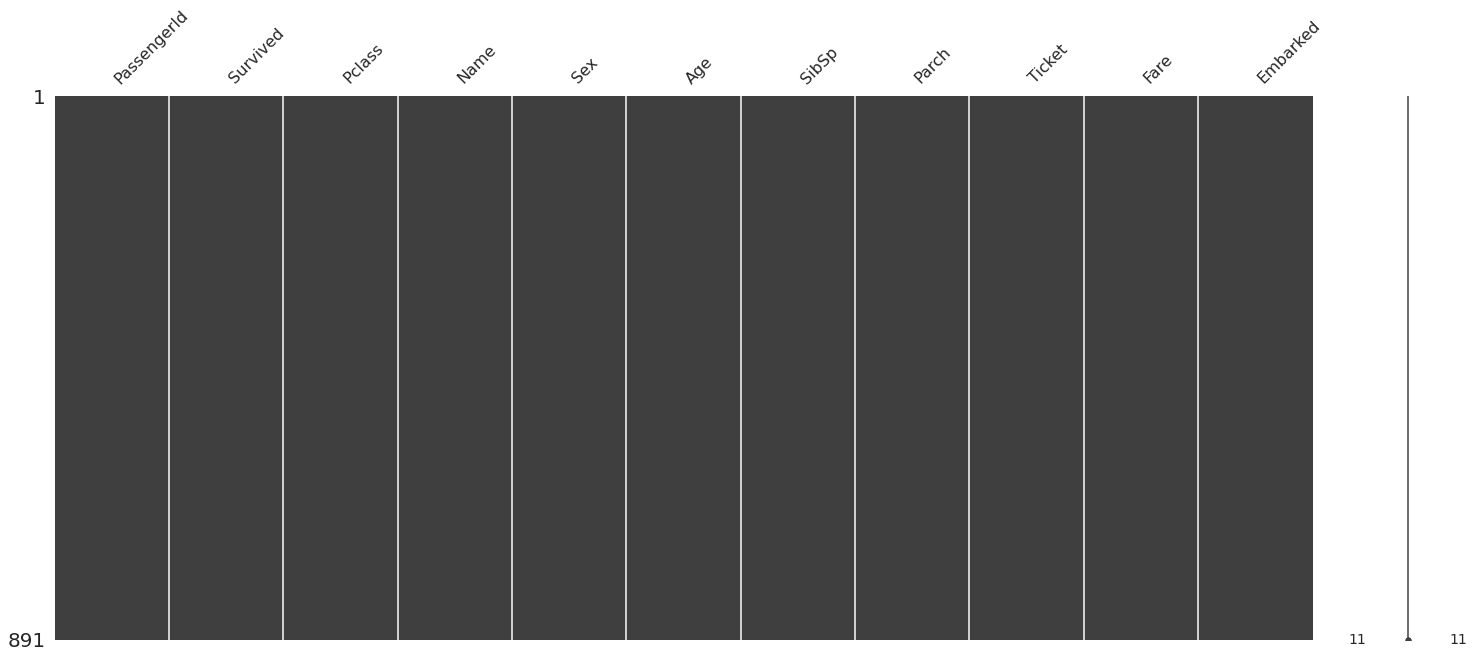

In [ ]:
msno.matrix(train) #결측치 없음!
plt.show()